In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import neighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
import itertools
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from google.colab import files
import math
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, regularizers, Input
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('combined_2019_2020.csv')
pd.set_option('display.max_columns', None)
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,original_year
0,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 00:00,2019,5,1,00:00,8.8,NaN,0.7,NaN,57.0,NaN,NaN,NaN,30.0,NaN,4.0,NaN,24.1,NaN,100.99,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 01:00,2019,5,1,01:00,8.9,NaN,-0.3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,101.00,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
2,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 02:00,2019,5,1,02:00,8.2,NaN,0.5,NaN,58.0,NaN,NaN,NaN,35.0,NaN,7.0,NaN,24.1,NaN,100.96,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 03:00,2019,5,1,03:00,8.1,NaN,0.3,NaN,58.0,NaN,NaN,NaN,2.0,NaN,5.0,NaN,24.1,NaN,100.96,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 04:00,2019,5,1,04:00,8.2,NaN,0.6,NaN,58.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,100.97,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019


In [ ]:
weather_counts = df['Weather'].value_counts(dropna=False)
print(weather_counts)

Weather
NaN                                       9208
Mostly Cloudy                             1783
Rain                                      1110
Cloudy                                     991
Mainly Clear                               979
Rain Showers                               861
Clear                                      856
Fog                                        392
Rain,Fog                                   387
Moderate Rain,Fog                          133
Snow                                       130
Moderate Rain                              120
Smoke                                       98
Rain Showers,Fog                            70
Drizzle,Fog                                 65
Moderate Rain Showers                       48
Fog,Smoke                                   45
Smoke,Haze                                  37
Rain,Snow                                   37
Drizzle                                     24
Freezing Fog                                20
Rain,

In [ ]:
weather_types = ['Mostly Cloudy', 'Clear', 'Fog',
                   'Snow','Rain']
new_df = df[df['Weather'].isin(weather_types)].groupby('Weather').head(130)


In [ ]:
new_df.drop([
    'Temp Flag', 'Dew Point Temp Flag', 'Rel Hum Flag',
    'Precip. Amount (mm)', 'Precip. Amount Flag', 'Wind Dir Flag',
    'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill Flag','Visibility Flag','Wind Spd Flag','Date/Time (LST)','Climate ID','Station Name','Longitude (x)','Latitude (y)','original_year','Year'], axis=1, inplace=True)
print(new_df.shape)
new_df.head()

(650, 12)


,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather
1,5,1,01:00,8.9,-0.3,52.0,NaN,0.0,24.1,101.00,NaN,Mostly Cloudy
4,5,1,04:00,8.2,0.6,58.0,NaN,0.0,24.1,100.97,NaN,Mostly Cloudy
7,5,1,07:00,9.0,2.1,62.0,9.0,9.0,48.3,101.01,NaN,Mostly Cloudy
10,5,1,10:00,13.9,1.9,44.0,19.0,23.0,48.3,101.01,NaN,Mostly Cloudy
22,5,1,22:00,9.8,3.5,65.0,19.0,16.0,24.1,100.88,NaN,Mostly Cloudy


In [ ]:
# Count NaN values for each column
nan_counts = new_df.isna().sum()

# Filter and display only columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
Dew Point Temp (°C)      1
Rel Hum (%)              1
Wind Dir (10s deg)      73
Wind Spd (km/h)          1
Wind Chill             565
dtype: int64


In [ ]:
new_df['Wind Chill'] = new_df['Wind Chill'].fillna(0)
new_df['Wind Dir (10s deg)'] = new_df['Wind Dir (10s deg)'].fillna(0)
new_df['Wind Spd (km/h)'] = new_df['Wind Spd (km/h)'].fillna(0)

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
# Count NaN values for each column
nan_counts = new_df.isna().sum()

# Filter and display only columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
Series([], dtype: int64)


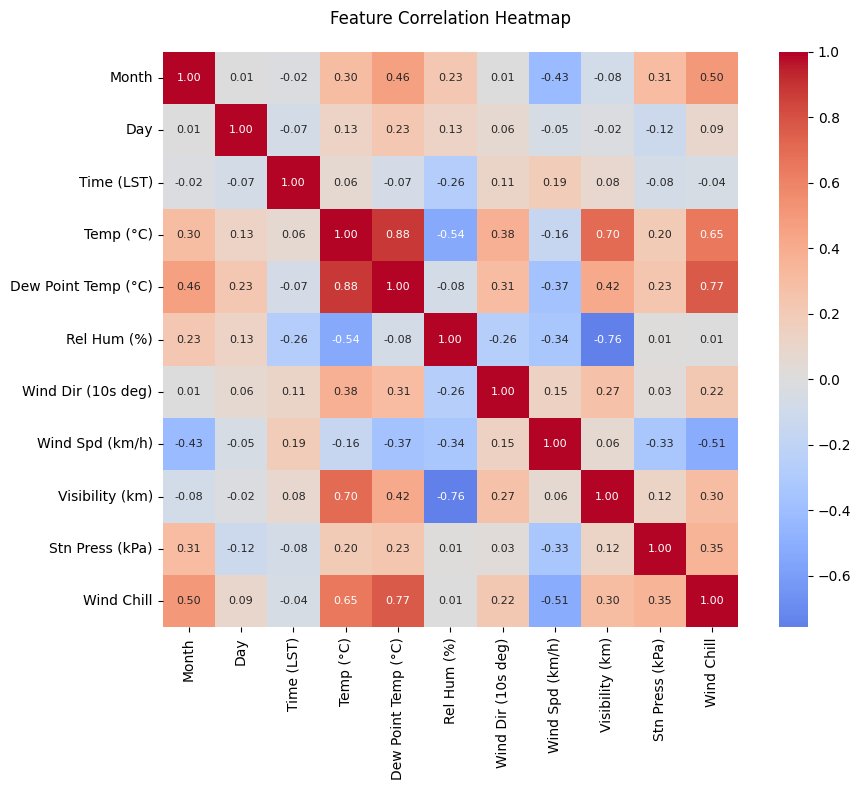


Highly correlated feature pairs (|correlation| > 0.8):
Dew Point Temp (°C) & Temp (°C): 0.878


In [ ]:
def create_features_correlation_heatmap(df, figsize=(10,8)):
    # Create a copy to avoid modifying the original DataFrame
    features = df.drop('Weather', axis=1).copy()

    # Function to convert time string to hours
    def time_to_hours(time_str):
        try:
            # Check if the value is already numeric
            if pd.api.types.is_numeric_dtype(type(time_str)):
                return time_str

            # Convert time string (HH:MM) to hours
            hours, minutes = map(int, time_str.split(':'))
            return hours + minutes/60
        except:
            return np.nan

    # Convert time columns to numeric (hours)
    for col in features.columns:
        # Check if column contains time strings
        if features[col].dtype == 'object' and ':' in str(features[col].iloc[0]):
            features[col] = features[col].apply(time_to_hours)

    # Drop any non-numeric columns
    numeric_features = features.select_dtypes(include=[np.number])

    # Create figure
    plt.figure(figsize=figsize)

    # Create correlation heatmap
    sns.heatmap(numeric_features.corr(),
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                annot_kws={"size": 8})

    plt.title('Feature Correlation Heatmap', pad=20)
    plt.xticks(rotation=90)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print highly correlated feature pairs
    print("\nHighly correlated feature pairs (|correlation| > 0.8):")
    corr_matrix = numeric_features.corr().abs()

    # Get upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index pairs of high correlations
    high_corr_pairs = [(i, j, corr_matrix.loc[i,j])
                       for i in corr_matrix.index
                       for j in corr_matrix.columns
                       if corr_matrix.loc[i,j] > 0.8 and i < j]

    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} & {feat2}: {corr:.3f}")

create_features_correlation_heatmap(new_df)

In [ ]:
weather_counts = new_df['Weather'].value_counts(dropna=False)
print(weather_counts)

Weather
Mostly Cloudy    130
Clear            130
Rain             130
Fog              130
Snow             129
Name: count, dtype: int64


In [ ]:
df_exploded = new_df.explode('Weather')
one_hot_encoded = pd.get_dummies(df_exploded['Weather']).astype(int)
df_combined = pd.concat([new_df, one_hot_encoded], axis=1)

In [ ]:
df_combined['hour'] = pd.to_datetime(df_combined['Time (LST)'], format='%H:%M').dt.hour
df_combined.drop('Time (LST)', axis=1, inplace=True)
df_combined.head()

,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather,Clear,Fog,Mostly Cloudy,Rain,Snow,hour
1,5,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,Mostly Cloudy,0,0,1,0,0,1
4,5,1,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,Mostly Cloudy,0,0,1,0,0,4
7,5,1,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,Mostly Cloudy,0,0,1,0,0,7
10,5,1,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,Mostly Cloudy,0,0,1,0,0,10
22,5,1,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,Mostly Cloudy,0,0,1,0,0,22


In [ ]:
df_combined.drop('Weather', axis=1, inplace=True)
df_combined.insert(2, 'hour', df_combined.pop('hour'))
df_combined.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Clear,Fog,Mostly Cloudy,Rain,Snow
1,5,1,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0,0,1,0,0
4,5,1,4,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0,0,1,0,0
7,5,1,7,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,0,0,1,0,0
10,5,1,10,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,0,0,1,0,0
22,5,1,22,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,0,0,1,0,0


In [ ]:
df_combined.columns

Index(['Month', 'Day', 'hour', 'Temp (°C)', 'Dew Point Temp (°C)',
       'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Wind Chill', 'Clear', 'Fog',
       'Mostly Cloudy', 'Rain', 'Snow'],
      dtype='object')

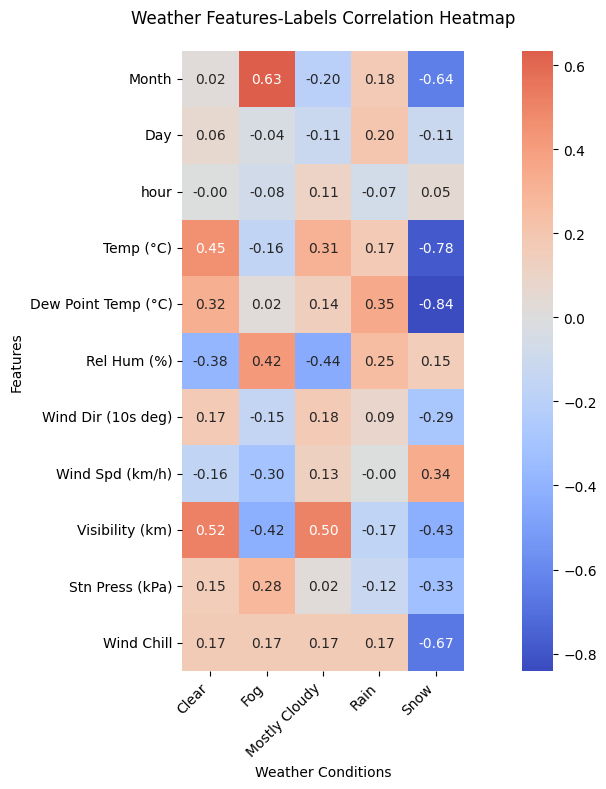


Strongest correlations for each weather condition:

Clear:
  Visibility (km): 0.516
  Temp (°C): 0.452
  Rel Hum (%): 0.381

Fog:
  Month: 0.634
  Visibility (km): 0.424
  Rel Hum (%): 0.420

Mostly Cloudy:
  Visibility (km): 0.502
  Rel Hum (%): 0.442
  Temp (°C): 0.309

Rain:
  Dew Point Temp (°C): 0.350
  Rel Hum (%): 0.250
  Day: 0.198

Snow:
  Dew Point Temp (°C): 0.841
  Temp (°C): 0.779
  Wind Chill: 0.668


In [ ]:
def create_weather_correlation_heatmap(df, figsize=(12, 8)):

    # Separate features and labels
    features = ['Month', 'Day', 'hour', 'Temp (°C)', 'Dew Point Temp (°C)',
       'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Wind Chill']

    labels = ['Clear', 'Fog','Mostly Cloudy', 'Rain', 'Snow']

    # Calculate correlations between features and labels
    correlations = pd.DataFrame(index=features)

    for label in labels:
        correlations[label] = [df[feature].corr(df[label]) for feature in features]

    # Create figure
    plt.figure(figsize=figsize)

    # Create heatmap
    sns.heatmap(correlations,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True)

    plt.title('Weather Features-Labels Correlation Heatmap', pad=20)
    plt.ylabel('Features')
    plt.xlabel('Weather Conditions')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print strongest correlations for each weather condition
    print("\nStrongest correlations for each weather condition:")
    for label in labels:
        strongest_corr = correlations[label].abs().nlargest(3)
        print(f"\n{label}:")
        for feat, corr in strongest_corr.items():
            print(f"  {feat}: {corr:.3f}")

# Example usage:
create_weather_correlation_heatmap(df_combined)

In [ ]:
df_combined.shape

(649, 16)

In [ ]:
# List of weather columns exactly as they appear in your DataFrame
weather_columns = ['Fog', 'Snow', 'Mostly Cloudy',  'Clear','Rain']

# Create y (target) DataFrame
y = df_combined[weather_columns].copy()

# Remove weather columns from original DataFrame
df_cleaned = df_combined.drop(columns=weather_columns)

In [ ]:
scaler = StandardScaler()
df_cleaned = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [ ]:
df_cleaned.drop(['hour','Day'], axis=1, inplace=True)
df_cleaned.head()

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill
0,-0.49004,-0.183834,-1.075303,-1.721802,-1.343313,-1.382981,0.222787,0.403199,0.332737
1,-0.49004,-0.268125,-0.942863,-1.377105,-1.343313,-1.382981,0.222787,0.355937,0.332737
2,-0.49004,-0.171792,-0.722129,-1.147307,-0.494331,-0.038218,1.641937,0.418953,0.332737
3,-0.49004,0.418246,-0.751560,-2.181397,0.448982,2.053636,1.641937,0.418953,0.332737
4,-0.49004,-0.075459,-0.516111,-0.974959,0.448982,1.007709,0.222787,0.214150,0.332737


In [ ]:
y.head()

,Fog,Snow,Mostly Cloudy,Clear,Rain
1,0,0,1,0,0
4,0,0,1,0,0
7,0,0,1,0,0
10,0,0,1,0,0
22,0,0,1,0,0


In [ ]:
df2 = df_cleaned.copy()
# df2.drop('Wind Chill', axis=1, inplace=True)
# df2.head()

In [ ]:
df2.drop('Stn Press (kPa)', axis=1, inplace=True)
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2.head()

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Wind Chill
0,-0.49004,-0.183834,-1.075303,-1.721802,-1.343313,-1.382981,0.222787,0.332737
1,-0.49004,-0.268125,-0.942863,-1.377105,-1.343313,-1.382981,0.222787,0.332737
2,-0.49004,-0.171792,-0.722129,-1.147307,-0.494331,-0.038218,1.641937,0.332737
3,-0.49004,0.418246,-0.751560,-2.181397,0.448982,2.053636,1.641937,0.332737
4,-0.49004,-0.075459,-0.516111,-0.974959,0.448982,1.007709,0.222787,0.332737


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test2.shape)
print(y_train.shape)
print(y_test.shape)

(519, 9)
(130, 8)
(519, 5)
(130, 5)


In [ ]:
# Count the number of 1s in each column
count_of_ones = y_train.sum()

print("Count of 1s in each column:")
print(count_of_ones)


Count of 1s in each column:
Fog              107
Snow             103
Mostly Cloudy    105
Clear            104
Rain             100
dtype: int64


In [ ]:
X_train.head(1)

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill
332,0.480568,0.707244,1.14675,0.518727,1.863952,-0.038218,0.697792,0.009346,0.332737


In [ ]:
X_train2.head(1)

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Wind Chill
332,0.480568,0.707244,1.14675,0.518727,1.863952,-0.038218,0.697792,0.332737


# **NN**

In [ ]:
seed_value = 33
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

model = tf.keras.Sequential([
    tf.keras.Input(shape=(9,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='swish',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(64, activation='linear',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(5, activation='softmax',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

model_train = model.fit(
    X_train,
    y_train,
    epochs=200,batch_size = 32,
    validation_split=0.2
)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - categorical_accuracy: 0.4712 - loss: 1.4838 - precision: 0.4712 - recall: 0.4712 - val_categorical_accuracy: 0.6154 - val_loss: 1.2900 - val_precision: 0.6154 - val_recall: 0.6154
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.6823 - loss: 1.2045 - precision: 0.6823 - recall: 0.6823 - val_categorical_accuracy: 0.6827 - val_loss: 1.1163 - val_precision: 0.6827 - val_recall: 0.6827
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.7185 - loss: 1.0198 - precision: 0.7185 - recall: 0.7185 - val_categorical_accuracy: 0.7115 - val_loss: 0.9928 - val_precision: 0.7115 - val_recall: 0.7115
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.7278 - loss: 0.8976 - precision: 0.7278 - recall: 0.7278 - val_categorical_accuracy: 0.6923 - val_loss: 0.9027 - val_precision: 0.6923 - val_recall: 0.6923
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_a

In [ ]:
# seed_value = 33
# os.environ['PYTHONHASHSEED'] = str(seed_value)
# random.seed(seed_value)
# np.random.seed(seed_value)
# tf.random.set_seed(seed_value)
# tf.keras.utils.set_random_seed(seed_value)
# tf.config.experimental.enable_op_determinism()

# model2 = tf.keras.Sequential([
#     tf.keras.Input(shape=(8,)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='swish',
#                           kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
#     tf.keras.layers.Dense(64, activation='linear',
#                           kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
#     tf.keras.layers.Dense(5, activation='softmax',
#                           kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
# ])
# model2.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),  # Reduced learning rate
#     loss='categorical_crossentropy',
#     metrics=[
#         tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
#         tf.keras.metrics.Precision(name='precision', top_k=1),
#         tf.keras.metrics.Recall(name='recall', top_k=1)
#     ]
# )

# model_train2 = model2.fit(
#     X_train2,
#     y_train2,
#     epochs=200,batch_size = 32,
#     validation_split=0.2
# )

In [ ]:
from re import X
random_state=16
n_samples = 1
X_test = X_test.reset_index(drop=True)
X_test2 = X_test2.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_test2 = y_test2.reset_index(drop=True)
np.random.seed(random_state)
random_indices = np.random.choice(len(X_test), n_samples, replace=False)
random_indices2 = np.random.choice(len(X_test2), n_samples, replace=False)

sample_X = X_test.iloc[random_indices]
sample_X2 = X_test2.iloc[random_indices2]
sample_y = y_test.iloc[random_indices]
sample_y2 = y_test2.iloc[random_indices2]

In [ ]:
print(sample_X)
print(sample_y)

        Month  Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  \
129 -1.137112  -1.159203            -1.060588     0.633626   

     Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
129           -0.965987           0.1112        -0.621665         0.103871   

     Wind Chill  
129    0.332737  
     Fog  Snow  Mostly Cloudy  Clear  Rain
129    0     1              0      0     0


In [ ]:
print(sample_X2)
print(sample_y2)

     Month  Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  Wind Dir (10s deg)  \
7 -0.49004   1.176866             0.984878    -0.917509            0.543313   

   Wind Spd (km/h)  Visibility (km)  Wind Chill  
7         1.007709         1.641937    0.332737  
   Fog  Snow  Mostly Cloudy  Clear  Rain
7    0     0              1      0     0


In [ ]:
y_pred = model.predict(sample_X)
print("Original Probabilities:")
print(y_pred)
max_prob_index = np.argmax(y_pred, axis=1)

# Create a binary matrix with the same shape as y_pred
y_pred_binary = np.zeros_like(y_pred)

# Set the position of the maximum probability to 1
y_pred_binary[np.arange(y_pred.shape[0]), max_prob_index] = 1

print("\nBinary Output:")
print(y_pred_binary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Original Probabilities:
[[2.0080799e-05 9.9986148e-01 1.1809278e-04 1.0585727e-08 4.1123585e-07]]

Binary Output:
[[0. 1. 0. 0. 0.]]


In [ ]:
# Predict probabilities
y_pred_proba = model.predict(X_test)

# Convert to binary predictions
y_pred = np.zeros_like(y_pred_proba)
y_pred[np.arange(len(y_pred_proba)), np.argmax(y_pred_proba, axis=1)] = 1

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model Accuracy: 0.87


In [ ]:
# y_pred_proba2 = model2.predict(X_test2)

# # Convert to binary predictions
# y_pred2 = np.zeros_like(y_pred_proba2)
# y_pred2[np.arange(len(y_pred_proba2)), np.argmax(y_pred_proba2, axis=1)] = 1
# accuracy2 = accuracy_score(y_test2, y_pred2)

# print(f"Model Accuracy: {accuracy2:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model Accuracy: 0.85


In [ ]:
# Convert y_test and y_pred from one-hot to class indices
y_test_indices = np.argmax(y_test.to_numpy(), axis=1)
y_pred_indices = np.argmax(y_pred_proba, axis=1)
cm = confusion_matrix(y_test_indices, y_pred_indices)

In [ ]:
y_train.head()

,Fog,Snow,Mostly Cloudy,Clear,Rain
2694,0,0,0,0,1
175,0,0,1,0,0
2260,0,0,0,1,0
2065,0,0,0,1,0
6899,0,1,0,0,0


In [ ]:
y_test3_class_labels = np.argmax(y_test3.values, axis=1)

# Train the RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=45, random_state=42)
modelRF.fit(X_train3, y_train3_class_labels)

# Make predictions on the test set
y_pred_rf = modelRF.predict(X_test3)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test3_class_labels, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 86.15%


In [ ]:
y_train3_class_labels = np.argmax(y_train3.values, axis=1)

# Train the GradientBoostingClassifier
modelGBC = GradientBoostingClassifier(n_estimators=45, random_state=42)
modelGBC.fit(X_train3, y_train3_class_labels)

GradientBoostingClassifier(n_estimators=45, random_state=42)

In [ ]:
y_test3_class_labels = np.argmax(y_test3.values, axis=1)

# Make predictions on the test set
y_pred = modelGBC.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test3_class_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.92%


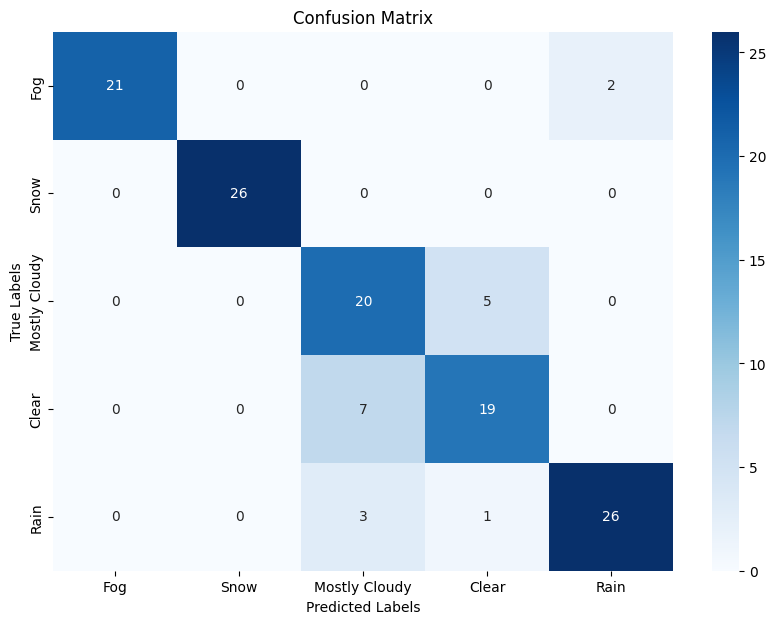

In [ ]:
# Define class labels (adjust these to match your weather classes)
class_labels = ['Fog', 'Snow', 'Mostly Cloudy', 'Clear','Rain']
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_test_indices2 = np.argmax(y_test2.to_numpy(), axis=1)
y_pred_indices2 = np.argmax(y_pred_proba2, axis=1)
cm2 = confusion_matrix(y_test_indices2, y_pred_indices2)

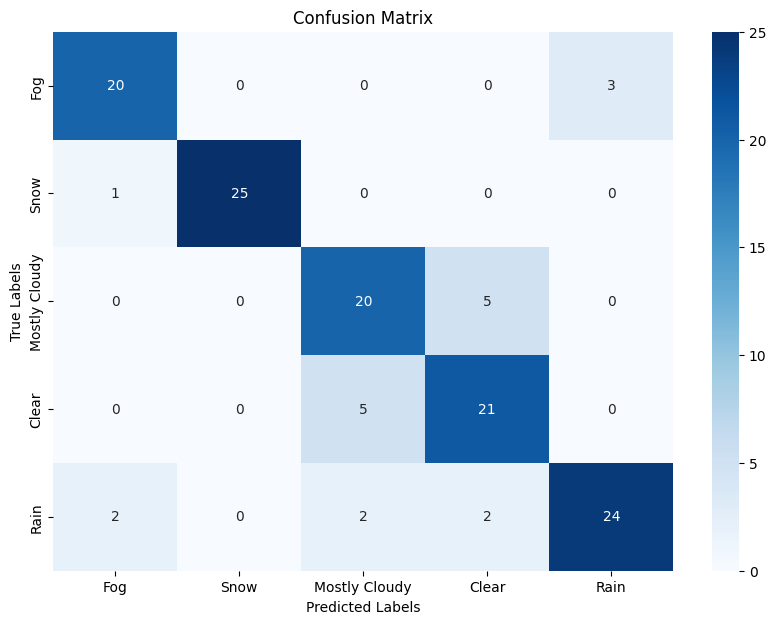

In [ ]:
class_labels = ['Fog', 'Snow', 'Mostly Cloudy', 'Clear','Rain']
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_combined['Sin_Wind_Spd'] = np.sin(df_combined['Wind Spd (km/h)'] + 1)
df_combined['Sin_Wind_chill'] = np.sin(df_combined['Wind Chill'] + 1)
df_combined.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Clear,Fog,Mostly Cloudy,Rain,Snow,Sin_Wind_Spd,Sin_Wind_chill
1,5,1,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0,0,1,0,0,0.841471,0.841471
4,5,1,4,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0,0,1,0,0,0.841471,0.841471
7,5,1,7,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,0,0,1,0,0,-0.544021,0.841471
10,5,1,10,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,0,0,1,0,0,-0.905578,0.841471
22,5,1,22,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,0,0,1,0,0,-0.961397,0.841471


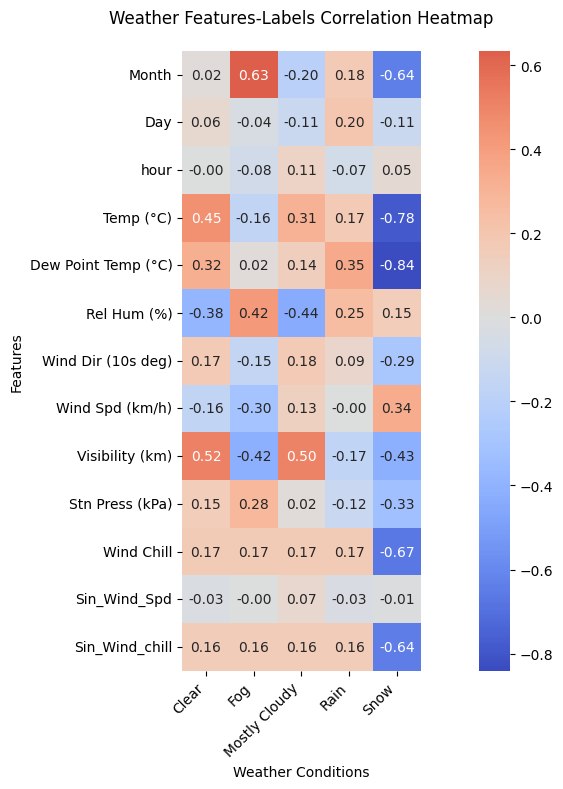


Strongest correlations for each weather condition:

Clear:
  Visibility (km): 0.516
  Temp (°C): 0.452
  Rel Hum (%): 0.381

Fog:
  Month: 0.634
  Visibility (km): 0.424
  Rel Hum (%): 0.420

Mostly Cloudy:
  Visibility (km): 0.502
  Rel Hum (%): 0.442
  Temp (°C): 0.309

Rain:
  Dew Point Temp (°C): 0.350
  Rel Hum (%): 0.250
  Day: 0.198

Snow:
  Dew Point Temp (°C): 0.841
  Temp (°C): 0.779
  Wind Chill: 0.668


In [ ]:
def create_weather_correlation_heatmap(df, figsize=(12, 8)):

    # Separate features and labels
    features = ['Month', 'Day', 'hour', 'Temp (°C)', 'Dew Point Temp (°C)',
       'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Wind Chill','Sin_Wind_Spd','Sin_Wind_chill']

    labels = ['Clear', 'Fog','Mostly Cloudy', 'Rain', 'Snow']

    # Calculate correlations between features and labels
    correlations = pd.DataFrame(index=features)

    for label in labels:
        correlations[label] = [df[feature].corr(df[label]) for feature in features]

    # Create figure
    plt.figure(figsize=figsize)

    # Create heatmap
    sns.heatmap(correlations,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True)

    plt.title('Weather Features-Labels Correlation Heatmap', pad=20)
    plt.ylabel('Features')
    plt.xlabel('Weather Conditions')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print strongest correlations for each weather condition
    print("\nStrongest correlations for each weather condition:")
    for label in labels:
        strongest_corr = correlations[label].abs().nlargest(3)
        print(f"\n{label}:")
        for feat, corr in strongest_corr.items():
            print(f"  {feat}: {corr:.3f}")

# Example usage:
create_weather_correlation_heatmap(df_combined)

In [ ]:
df_cleaned2 = df_combined.drop(columns=weather_columns)
df_cleaned2.drop(['hour','Day'], axis=1, inplace=True)
df_cleaned2.head()

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Sin_Wind_Spd,Sin_Wind_chill
1,5,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0.841471,0.841471
4,5,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0.841471,0.841471
7,5,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,-0.544021,0.841471
10,5,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,-0.905578,0.841471
22,5,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,-0.961397,0.841471


In [ ]:
df_cleaned2 = pd.DataFrame(scaler.fit_transform(df_cleaned2), columns=df_cleaned2.columns)
df_cleaned2.head()

In [ ]:
df_cleaned2.head()

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Sin_Wind_Spd,Sin_Wind_chill
0,-0.49004,-0.183834,-1.075303,-1.721802,-1.343313,-1.382981,0.222787,0.403199,0.332737,1.120395,0.319039
1,-0.49004,-0.268125,-0.942863,-1.377105,-1.343313,-1.382981,0.222787,0.355937,0.332737,1.120395,0.319039
2,-0.49004,-0.171792,-0.722129,-1.147307,-0.494331,-0.038218,1.641937,0.418953,0.332737,-0.753823,0.319039
3,-0.49004,0.418246,-0.751560,-2.181397,0.448982,2.053636,1.641937,0.418953,0.332737,-1.242917,0.319039
4,-0.49004,-0.075459,-0.516111,-0.974959,0.448982,1.007709,0.222787,0.214150,0.332737,-1.318426,0.319039


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_cleaned2, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(519, 11)
(130, 11)
(519, 5)
(130, 5)


In [ ]:
seed_value = 33
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='swish',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(64, activation='linear',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(5, activation='softmax',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
])
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

model_train3 = model3.fit(
    X_train3,
    y_train3,
    epochs=200 ,batch_size = 32,
    validation_split=0.2
)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - categorical_accuracy: 0.4932 - loss: 1.4382 - precision: 0.4932 - recall: 0.4932 - val_categorical_accuracy: 0.6731 - val_loss: 1.2301 - val_precision: 0.6731 - val_recall: 0.6731
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - categorical_accuracy: 0.7214 - loss: 1.1116 - precision: 0.7214 - recall: 0.7214 - val_categorical_accuracy: 0.7115 - val_loss: 1.0208 - val_precision: 0.7115 - val_recall: 0.7115
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7589 - loss: 0.9192 - precision: 0.7589 - recall: 0.7589 - val_categorical_accuracy: 0.7212 - val_loss: 0.8849 - val_precision: 0.7212 - val_recall: 0.7212
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - categorical_accuracy: 0.7746 - loss: 0.7948 - precision: 0.7746 - recall: 0.7746 - val_categorical_accuracy: 0.7019 - val_loss: 0.7920 - val_precision: 0.7019 - val_recall: 0.7019
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical

In [ ]:
y_pred_proba3 = model3.predict(X_test3)

# Convert to binary predictions
y_pred3 = np.zeros_like(y_pred_proba3)
y_pred3[np.arange(len(y_pred_proba3)), np.argmax(y_pred_proba3, axis=1)] = 1

accuracy3 = accuracy_score(y_test3, y_pred3)

print(f"Model3 Accuracy: {accuracy3:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model3 Accuracy: 0.88


In [ ]:
# Convert y_test and y_pred from one-hot to class indices
y_test_indices3 = np.argmax(y_test3.to_numpy(), axis=1)
y_pred_indices3 = np.argmax(y_pred_proba3, axis=1)
cm3 = confusion_matrix(y_test_indices3, y_pred_indices3)

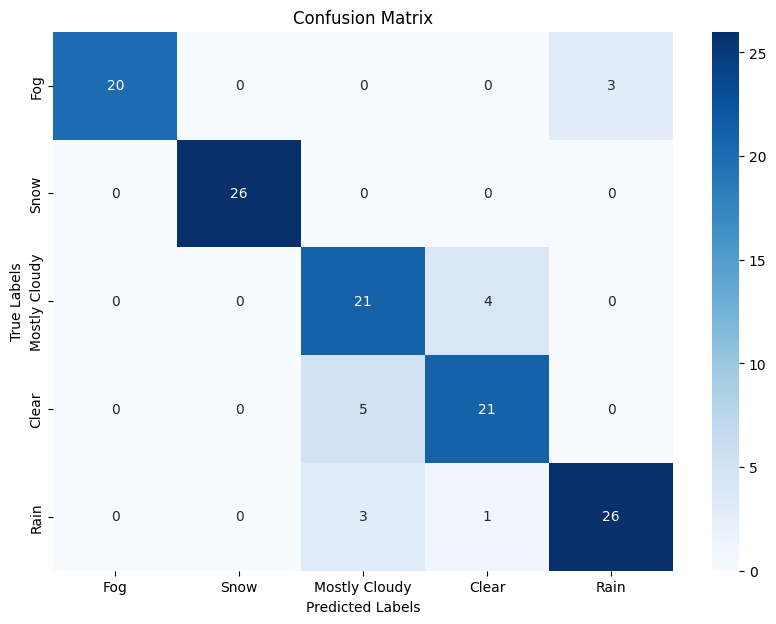

In [ ]:
class_labels = ['Fog', 'Snow', 'Mostly Cloudy', 'Clear','Rain']
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

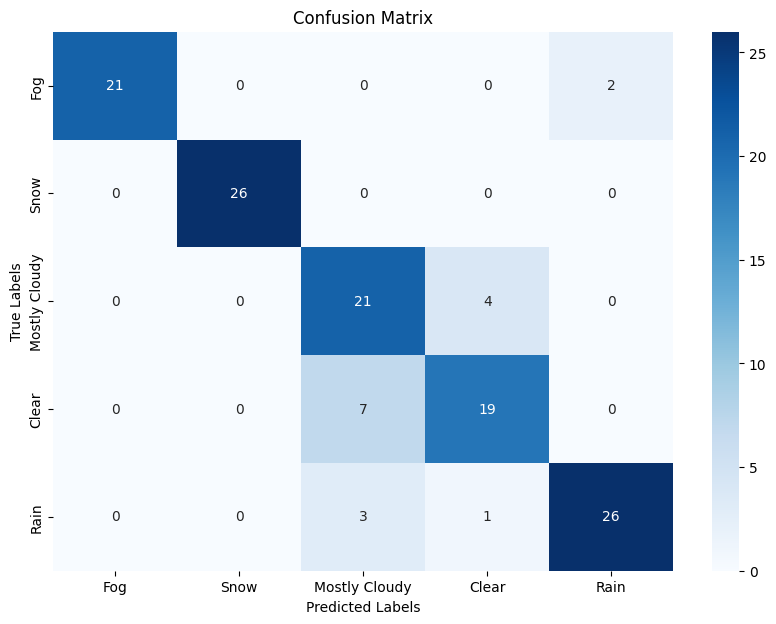

In [ ]:
class_labels = ['Fog', 'Snow', 'Mostly Cloudy', 'Clear','Rain']
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_train3.head()

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Sin_Wind_Spd,Sin_Wind_chill
332,0.480568,0.707244,1.146750,0.518727,1.863952,-0.038218,0.697792,0.009346,0.332737,-0.753823,0.319039
29,-0.490040,0.333955,0.425686,-0.055768,0.731976,-0.337054,1.641937,1.269677,0.332737,1.320449,0.319039
302,0.480568,0.249664,0.558126,0.403828,-1.343313,-1.382981,1.641937,1.096381,0.332737,1.120395,0.319039
286,0.157032,0.743369,0.558126,-0.802611,-1.343313,-1.382981,0.222787,0.418953,0.332737,1.120395,0.319039
554,-1.460648,-1.821490,-1.958238,0.346379,-0.588662,1.455963,-1.120127,-1.235232,-2.603494,1.217081,-0.408544
